<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validation Errors: None


/tmp/ipython-input-3330460532.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x='BMI_Category', palette='Set2')


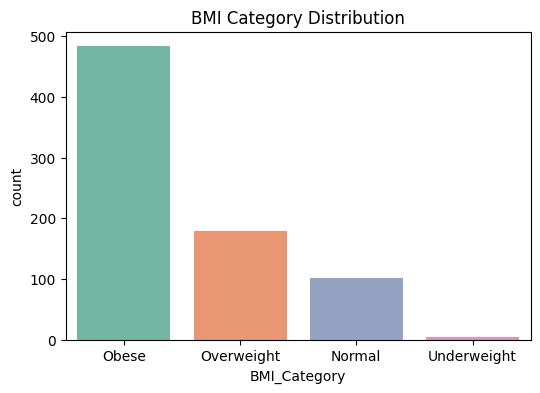

/tmp/ipython-input-3330460532.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x='Age_Bin', palette='Set1')


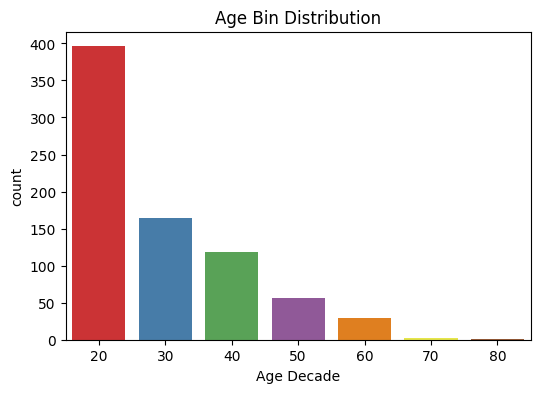

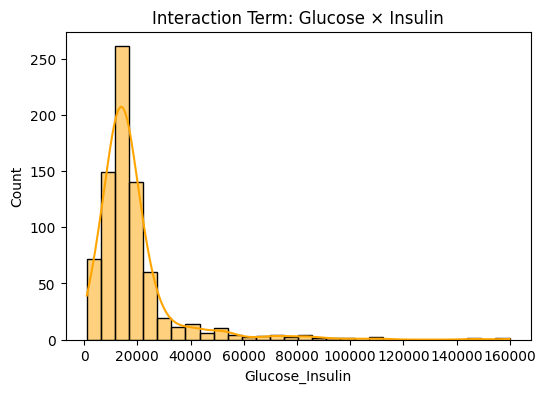

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Step 3: Data Cleaning
def clean_data(df):
    df = df.copy()

    # Replace 0s with NaN for columns where 0 is invalid
    cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

    # Fill NaNs with column median
    for col in cols_to_fix:
        df[col] = df[col].fillna(df[col].median())

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    return df

# Step 4: Feature Engineering
def engineer_features(df):
    df = df.copy()

    # BMI Categories
    def bmi_category(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif bmi < 25:
            return 'Normal'
        elif bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'

    df['BMI_Category'] = df['BMI'].apply(bmi_category)

    # Age bins (decades)
    df['Age_Bin'] = (df['Age'] // 10) * 10

    # Interaction term
    df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']

    return df

# Step 5: Data Validation
def validate_data(df):
    errors = []

    if df.isnull().sum().any():
        errors.append("Null values found after cleaning.")

    if not set(df['BMI_Category'].unique()).issubset({'Underweight', 'Normal', 'Overweight', 'Obese'}):
        errors.append("Unexpected BMI categories.")

    if df['Age_Bin'].min() < 20 or df['Age_Bin'].max() > 80:
        errors.append("Unexpected Age_Bin values.")

    return errors

# Step 6: Execute the Pipeline
df_cleaned = clean_data(df)
df_features = engineer_features(df_cleaned)
errors = validate_data(df_features)

print("Validation Errors:", errors if errors else "None")

# Step 7: Save the cleaned data
df_features.to_csv("diabetes_prepared.csv", index=False)
# BMI Category Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_features, x='BMI_Category', palette='Set2')
plt.title('BMI Category Distribution')
plt.show()

# Age Bin Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_features, x='Age_Bin', palette='Set1')
plt.title('Age Bin Distribution')
plt.xlabel('Age Decade')
plt.show()

# Glucose * Insulin Distribution
plt.figure(figsize=(6,4))
sns.histplot(df_features['Glucose_Insulin'], bins=30, kde=True, color='orange')
plt.title('Interaction Term: Glucose × Insulin')
plt.xlabel('Glucose_Insulin')
plt.show()


Validation Errors: ['Null or Inf in avg_charges_per_month.']


/tmp/ipython-input-2490619970.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_feat, x='tenure_group', palette='Set2')


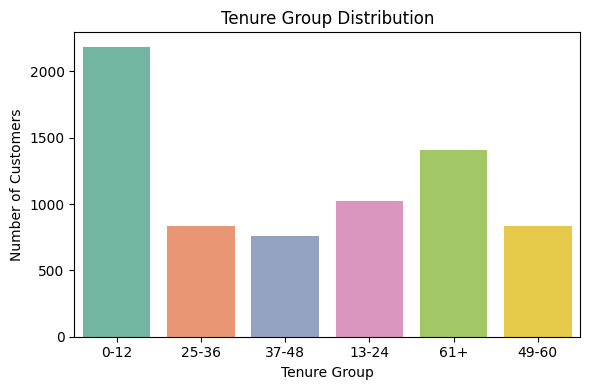

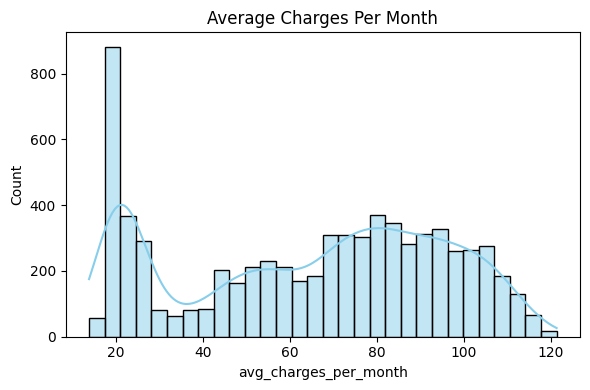

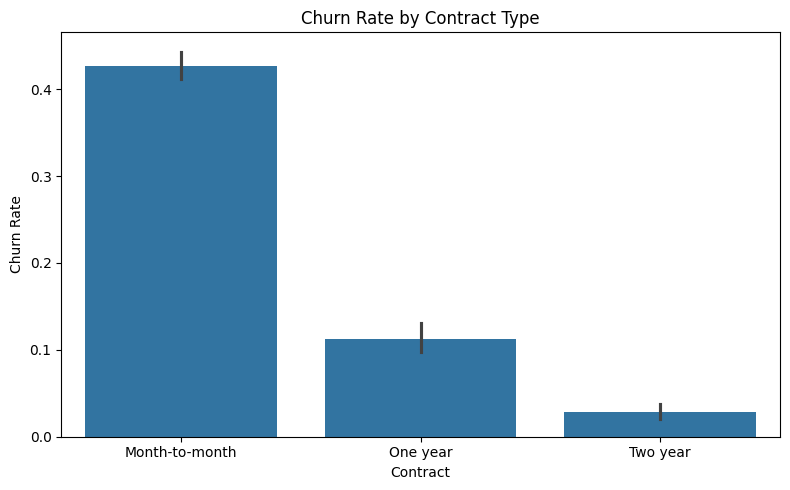

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset from a working GitHub mirror
url = "https://raw.githubusercontent.com/SohelRaja/Customer-Churn-Analysis/master/Decision%20Tree/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Step 3: Data Cleaning
def clean_data(df):
    df = df.copy()
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
    df.drop(columns=['customerID'], inplace=True)
    return df

# Step 4: Feature Engineering
def engineer_features(df):
    df = df.copy()
    def tenure_grouping(tenure):
        if tenure <= 12: return '0-12'
        elif tenure <= 24: return '13-24'
        elif tenure <= 36: return '25-36'
        elif tenure <= 48: return '37-48'
        elif tenure <= 60: return '49-60'
        else: return '61+'
    df['tenure_group'] = df['tenure'].apply(tenure_grouping)

    df['avg_charges_per_month'] = df['TotalCharges'] / df['tenure']
    df['avg_charges_per_month'] = df['avg_charges_per_month'].replace([np.inf, -np.inf], np.nan)

    df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)
    return df

# Step 5: Validation
def validate_data(df):
    errors = []
    if df['avg_charges_per_month'].isnull().sum() > 0:
        errors.append("Null or Inf in avg_charges_per_month.")
    expected_tenure_groups = {'0-12','13-24','25-36','37-48','49-60','61+'}
    present = set(df['tenure_group'].unique())
    if not expected_tenure_groups.issubset(present):
        errors.append(f"Missing tenure_group bins: {expected_tenure_groups - present}")
    return errors

# Step 6: Execute Pipeline
df_clean = clean_data(df)
df_feat = engineer_features(df_clean)
errors = validate_data(df_feat)
print("Validation Errors:", errors or "None")

# Step 7: Save Prepared Data
df_feat.to_csv("telco_churn_prepared.csv", index=False)

# Step 8: Visualizations

plt.figure(figsize=(6,4))
sns.countplot(data=df_feat, x='tenure_group', palette='Set2')
plt.title('Tenure Group Distribution')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_feat['avg_charges_per_month'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Average Charges Per Month')
plt.xlabel('avg_charges_per_month')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Contract', y=df['Churn'].map({'Yes':1,'No':0}))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()


Initial shape: (20640, 10)
Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
✅ Log-transform values are all finite.
Saved cleaned dataset to housing_cleaned.csv


/tmp/ipython-input-4198591485.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income_quartile', palette='coolwarm')


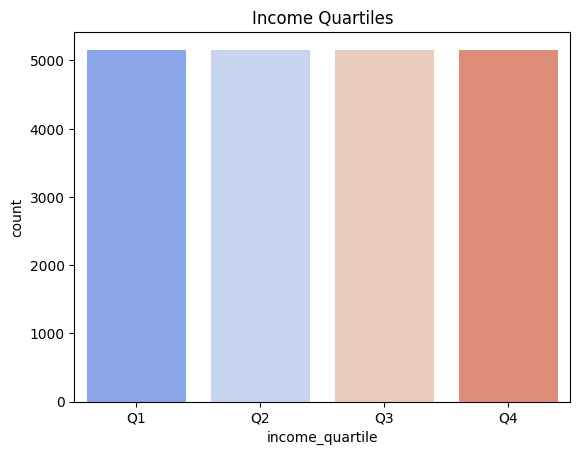

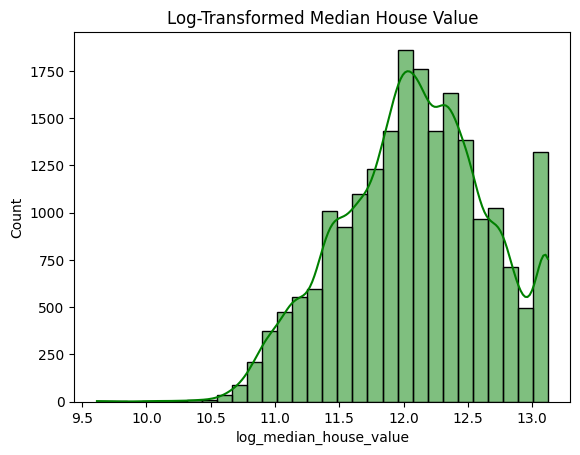

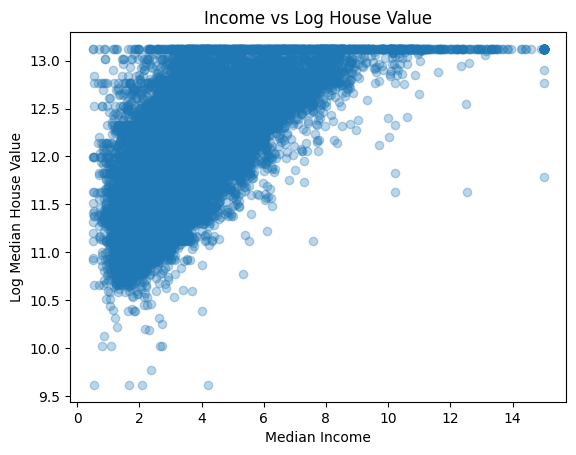

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
print("Initial shape:", df.shape)
df.head()
# Impute missing values in total_bedrooms with median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Check for any rows with extreme ocean_proximity categories (unusual outliers)
print("Unique values in ocean_proximity:", df['ocean_proximity'].unique())
# (No explicit outlier categories in this dataset, so we skip actual drop step.)
# Create new ratio features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Bin median_income into quartiles
df['income_quartile'] = pd.qcut(df['median_income'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Log-transform the target: median_house_value
df['log_median_house_value'] = np.log(df['median_house_value'])
# Ensure no zero or negative values in the new ratio features
ratio_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
for col in ratio_features:
    if (df[col] <= 0).any():
        print(f"⚠️ Invalid values in {col}: Found {sum(df[col] <= 0)} entries.")

# Check log-median-house-value has all finite values
if not np.all(np.isfinite(df['log_median_house_value'])):
    print("⚠️ Non-finite values found in log_median_house_value!")
else:
    print("✅ Log-transform values are all finite.")
df.to_csv("housing_cleaned.csv", index=False)
print("Saved cleaned dataset to housing_cleaned.csv")
# Income Quartile Distribution
sns.countplot(data=df, x='income_quartile', palette='coolwarm')
plt.title('Income Quartiles')
plt.show()

# Histogram of log-transformed house values
sns.histplot(df['log_median_house_value'], bins=30, kde=True, color='green')
plt.title("Log-Transformed Median House Value")
plt.xlabel("log_median_house_value")
plt.show()

# Scatter plot: Income vs. House Value (log scale)
plt.scatter(df['median_income'], df['log_median_house_value'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Log Median House Value')
plt.title('Income vs Log House Value')
plt.show()
